## Importing packages

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

## Loading data

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [3]:
netflix_movie = netflix_df[netflix_df['type'] == 'Movie']
netflix_tvshow = netflix_df[netflix_df['type'] == 'TV Show']

In [4]:
print(netflix_df.shape)
print(netflix_df.columns)
print(netflix_df.nunique())

(7787, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.duplicated().sum()

0

In [7]:
netflix_df_notna = netflix_df.copy()
netflix_df_notna.dropna(inplace=True)
netflix_df_notna.reset_index(inplace=True)
netflix_df_notna.drop(columns="index", inplace=True)
netflix_df_notna.shape

(4808, 12)

# Create get_info function to get TV Shows/Movies with certain genre/director/country and etc.

In [27]:
def get_info(column_name, name, required_column = list(netflix_df.columns)):
     return netflix_df[netflix_df[column_name].str.contains(name)][required_column].head()  

get_info("listed_in", 'Dramas', ['show_id', 'title', 'cast', 'director', 'listed_in', 'date_added'])

,show_id,title,cast,director,listed_in,date_added
0,s1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...","August 14, 2020"
1,s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Jorge Michel Grau,"Dramas, International Movies","December 23, 2016"
4,s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Robert Luketic,Dramas,"January 1, 2020"
5,s6,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Serdar Akar,"International TV Shows, TV Dramas, TV Mysteries","July 1, 2017"
7,s8,187,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",Kevin Reynolds,Dramas,"November 1, 2019"


# Count countries

In [14]:
all_countries = set()
df = netflix_df[netflix_df['country'].notna()]
for i in range(df.shape[0]):
    countries = df.iloc[i]["country"].split(", ")
    all_countries.update(countries)
all_countries
print('In total: ' + str(len(all_countries)) + ' countries')

In total: 121 countries


In [15]:
country_count = {'country': [], 'count':[]}
netflix_df_countries = netflix_df[netflix_df['country'].notna()]
for i in all_countries:
    count = netflix_df_countries[netflix_df_countries['country'].str.contains(i)].shape[0]
    country_count['country'].append(i)
    country_count['count'].append(count)

country_count = pd.DataFrame(country_count)
top_countries = country_count.sort_values(by='count', ascending=False)[:10]
top_countries.reset_index(inplace=True, drop=True)
top_countries

,country,count
0,United States,3297
1,India,990
2,United Kingdom,723
3,Canada,412
4,"United States,",401
5,France,349
6,Japan,287
7,"United Kingdom,",246
8,Spain,215
9,South Korea,212


In [17]:
data = dict(
    number= top_countries['count'].to_list(),
    country= top_countries['country'].to_list())
fig = px.funnel(data, x='number', y='country')
fig.show()

# Most favourite genre of shows.

In [67]:
all_genre = set()
df = netflix_df[netflix_df['listed_in'].notna()]
for i in range(df.shape[0]):
    genre = df.iloc[i]["listed_in"].split(", ")
    all_genre.update(genre)
all_genre
print('In total: ' + str(len(all_genre)) + ' genres')

In total: 42 genres


In [85]:
genre_count = {'genre': [], 'count':[]}
netflix_df_genre = netflix_df[netflix_df['country'].notna()]
for i in all_genre:
    count = netflix_df_genre[netflix_df_countries['listed_in'].str.contains(i)].shape[0]
    genre_count['genre'].append(i)
    genre_count['count'].append(count)

genre_count = pd.DataFrame(genre_count)
top_genre = genre_count.sort_values(by='count', ascending=False)[:10]
top_genre.reset_index(inplace=True, drop=True)
top_genre

,genre,count
0,Movies,3765
1,Dramas,2685
2,International Movies,2342
3,Comedies,1899
4,TV Shows,1380
5,International TV Shows,1043
6,Action & Adventure,847
7,Documentaries,742
8,Independent Movies,670
9,TV Dramas,623


In [86]:
trace1 = go.Bar(y=top_genre['genre'].to_list(), x=top_genre['count'].to_list(), orientation="h", marker=dict(color="#221f1f"))
data = [trace1]
layout = go.Layout(title="Count genres in Netflix", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

# Genre correlation in Netflix Movies or TV Shows

In [74]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

/var/folders/m2/98900gq113sblxvm4r5_s65h0000gn/T/ipykernel_48207/2787485022.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


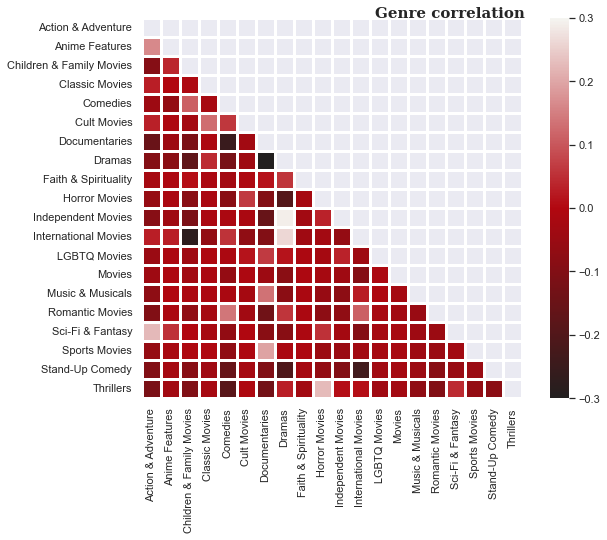

In [76]:
genre_heatmap(netflix_movie, 'Movie')
plt.show()

## Converting column date_added to datetime and adding colunms day_added, year_added and month_added for analysis

In [22]:
netflix_df_date = netflix_df.copy()
netflix_df_date = netflix_df_date[netflix_df_date['date_added'].notna()]

netflix_df_date['date_added'] = pd.to_datetime(netflix_df_date['date_added'])
netflix_df_date['day_added'] = netflix_df_date['date_added'].dt.day
netflix_df_date['year_added'] = netflix_df_date['date_added'].dt.year
netflix_df_date['month_added'] = netflix_df_date['date_added'].dt.month
netflix_df_date['year_added'].astype(int);
netflix_df_date['day_added'].astype(int);

netflix_df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Type')

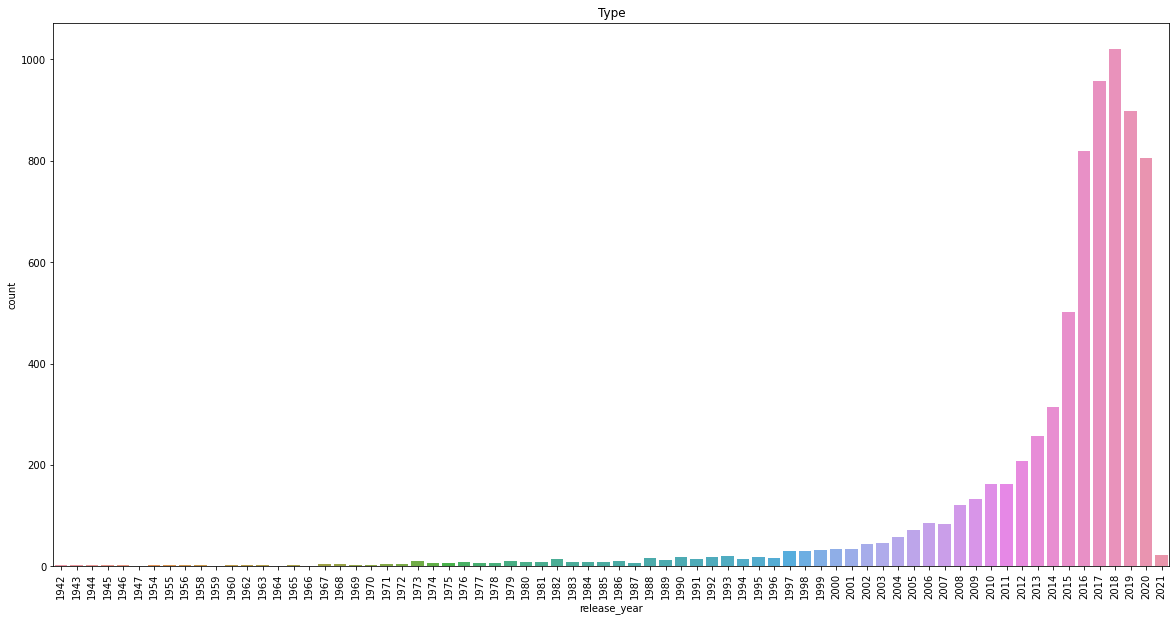

In [23]:
sns.countplot(df['release_year'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
plt.title('Type')

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


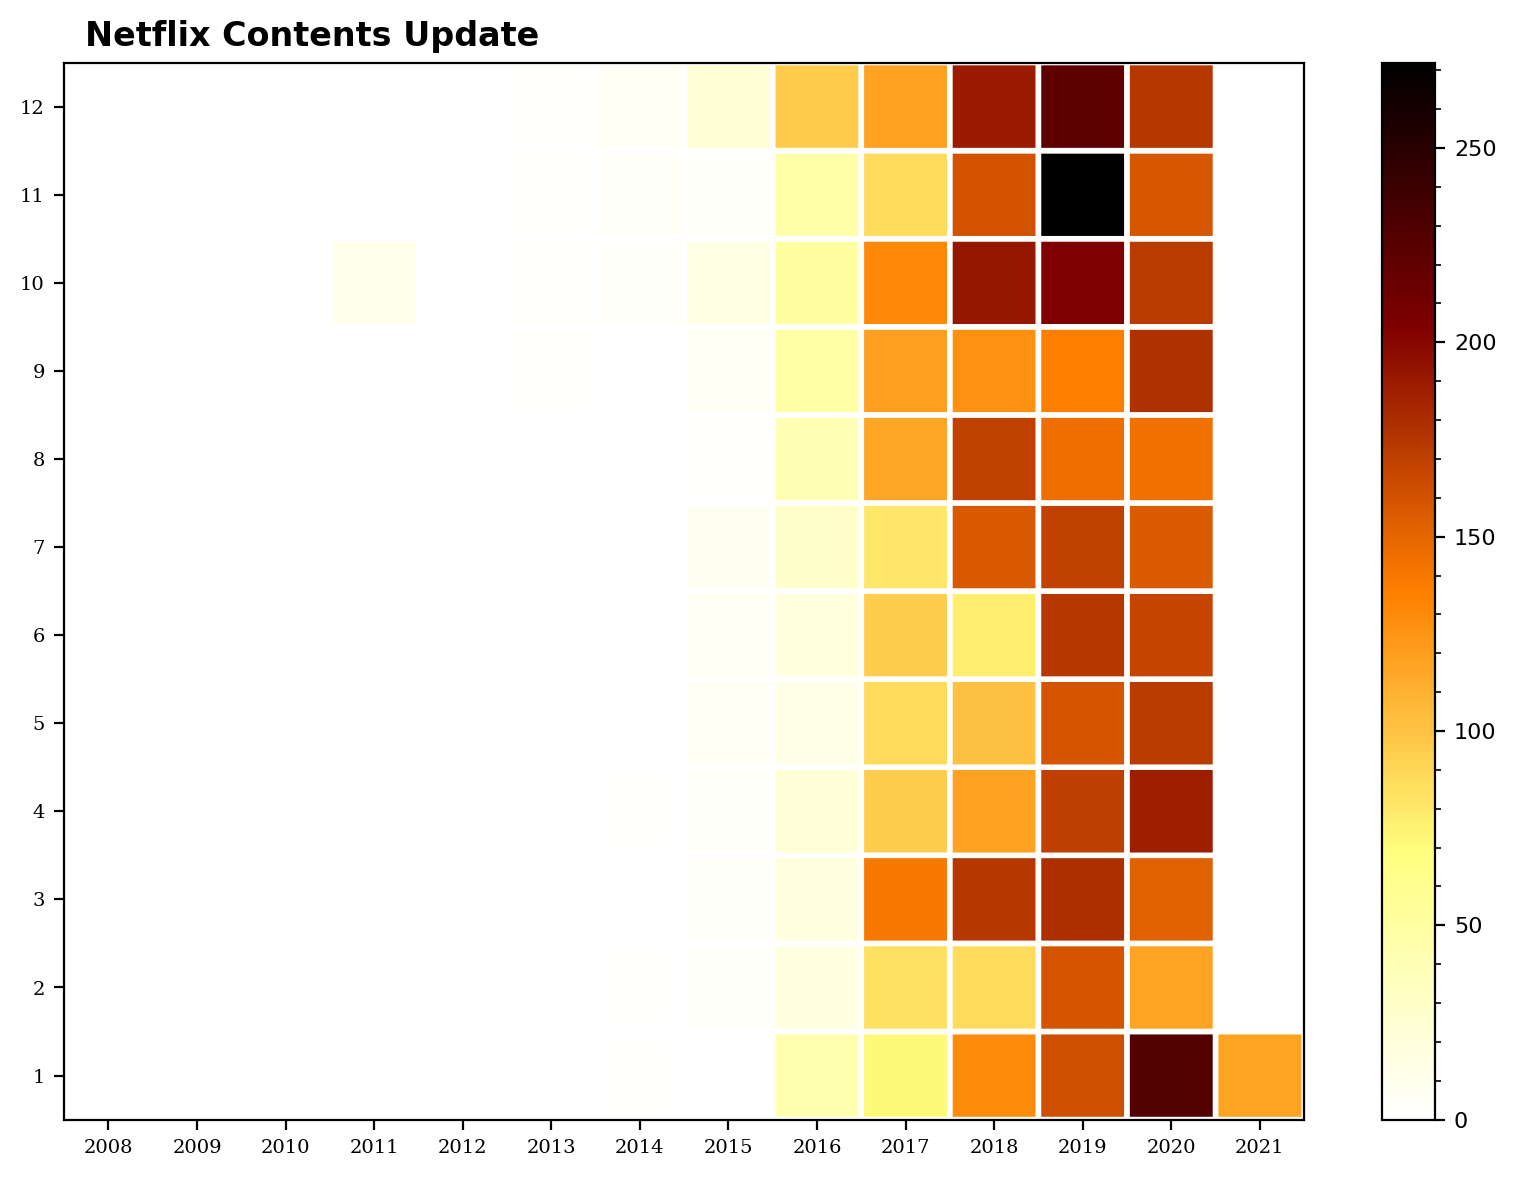

In [24]:
month_order = range(1, 13)
df = netflix_df_date.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# Which type of shows are more on Netflix

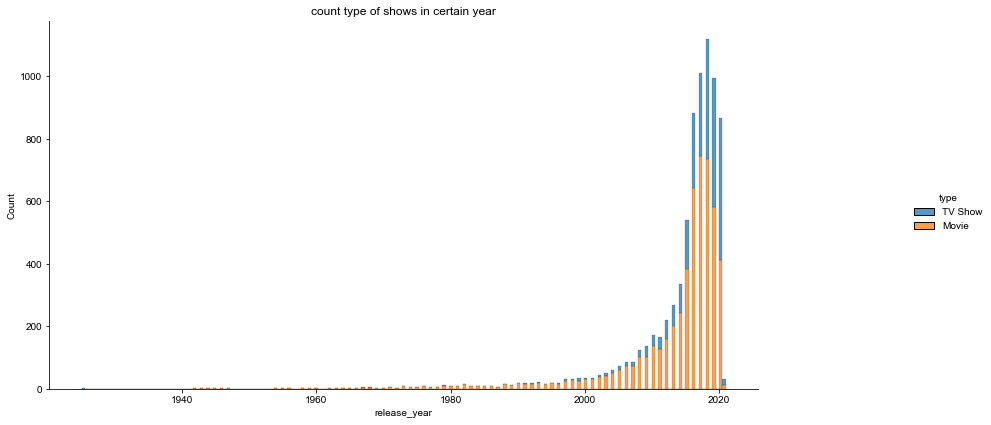

In [28]:
sns.displot(data=netflix_df, x="release_year", hue="type", multiple="stack")
sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.title('count type of shows in certain year')
plt.show()

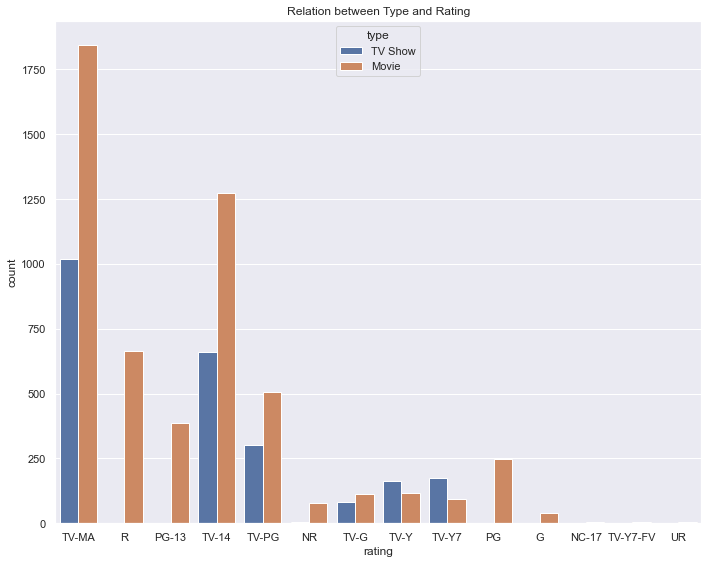

In [119]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.countplot(x='rating',hue='type',data=netflix_df)
plt.title('Relation between Type and Rating')
plt.show()

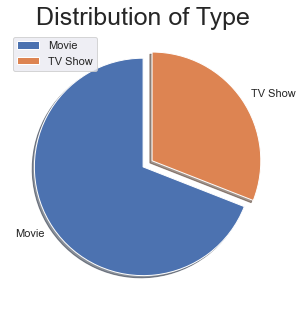

In [30]:
labels = ['Movie', 'TV Show']
size = netflix_df['type'].value_counts()
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels=labels, explode=explode, shadow=True, startangle=90)
plt.title('Distribution of Type', fontsize=25)
plt.legend(loc='upper left')

# What TV Show has the most amount of seasons

In [140]:
features=['title','duration']
durations= netflix_tvshow[features]

durations['num_of_seasons']=durations['duration'].str.replace(' Season','')
durations['num_of_seasons']=durations['num_of_seasons'].str.replace('s','')

durations['num_of_seasons']=durations['num_of_seasons'].astype(str).astype(int)

/var/folders/m2/98900gq113sblxvm4r5_s65h0000gn/T/ipykernel_48207/788942014.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m2/98900gq113sblxvm4r5_s65h0000gn/T/ipykernel_48207/788942014.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m2/98900gq113sblxvm4r5_s65h0000gn/T/ipykernel_48207/788942014.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

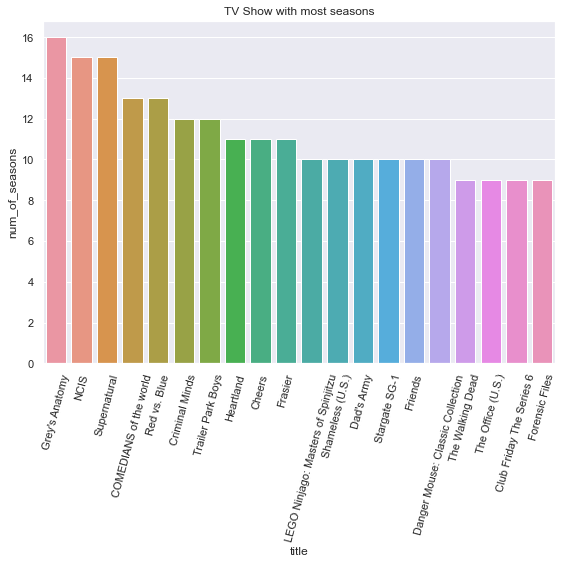

In [146]:
t=['title','num_of_seasons']
top=durations[t]
top20 = top.sort_values(by='num_of_seasons', ascending=False)[:20]

plt.figure(figsize=(8, 8))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=75)
plt.title('TV Show with most seasons')
ax = sns.barplot(x="title", y="num_of_seasons", data=top20)